<a href="https://colab.research.google.com/github/Snehitha2021/co2-emission/blob/main/hours_vs_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
#step 1
df=pd.read_csv("/content/Employee_StudyHours.csv")

In [4]:
df.head(5) #prints few rows

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [5]:
df.shape 

(32, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   30 non-null     float64
 1   Scores  30 non-null     float64
dtypes: float64(2)
memory usage: 640.0 bytes


In [7]:
#step 2
#Vishualize
import matplotlib.pyplot as plt

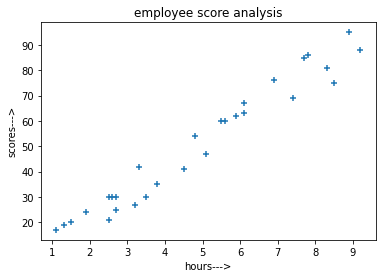

In [8]:
plt.scatter(df.Hours,df.Scores,marker='+')
plt.xlabel("hours--->")
plt.ylabel("scores--->")
plt.title("employee score analysis")
plt.show()

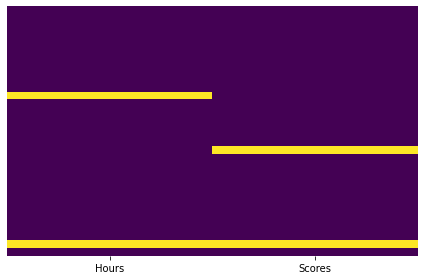

In [9]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

In [10]:
#to replace nan values
import math
median_hours = math.floor(df.Hours.median())
median_hours

4

In [40]:
df.Hours=df.Hours.fillna(median_hours)

In [41]:
mean_Scores=math.floor(df.Scores.mean())
mean_Scores

51

In [42]:
df.Scores=df.Scores.fillna(mean_Scores)


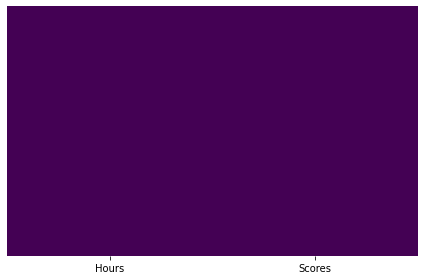

In [43]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

In [57]:
X=df.iloc[:,:-1].values #indepenent
Y=df.iloc[:,-1:].values   #dependent

In [58]:
Y

array([[21.],
       [47.],
       [27.],
       [75.],
       [30.],
       [20.],
       [88.],
       [60.],
       [81.],
       [25.],
       [85.],
       [85.],
       [62.],
       [41.],
       [42.],
       [17.],
       [95.],
       [30.],
       [51.],
       [24.],
       [67.],
       [69.],
       [30.],
       [54.],
       [35.],
       [76.],
       [86.],
       [19.],
       [30.],
       [63.],
       [51.],
       [60.]])

In [59]:
#X=np.array(df['Hours'])  using munpy
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [4. ],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [3.4],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8],
       [1.3],
       [2.6],
       [6.1],
       [4. ],
       [5.6]])

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [61]:
X_train

array([[7.8],
       [6.1],
       [4.5],
       [3.8],
       [1.5],
       [2.5],
       [8.3],
       [4. ],
       [6.9],
       [4.8],
       [5.1],
       [5.6],
       [9.2],
       [3.5],
       [3.4],
       [6.1],
       [1.9],
       [2.7],
       [5.5],
       [1.3],
       [8.5],
       [2.5],
       [7.4],
       [1.1],
       [5.9]])

In [62]:
X_test

array([[4. ],
       [2.7],
       [7.7],
       [3.2],
       [8.9],
       [3.3],
       [2.6]])

In [63]:
Y_train

array([[86.],
       [67.],
       [41.],
       [35.],
       [20.],
       [30.],
       [81.],
       [51.],
       [76.],
       [54.],
       [47.],
       [60.],
       [88.],
       [30.],
       [51.],
       [63.],
       [24.],
       [25.],
       [60.],
       [19.],
       [75.],
       [21.],
       [69.],
       [17.],
       [62.]])

In [64]:
Y_test

array([[85.],
       [30.],
       [85.],
       [27.],
       [95.],
       [42.],
       [30.]])

In [65]:
#TRAINING MODELL
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [66]:
model.fit(X_train,Y_train)

LinearRegression()

In [67]:
#oredict
y_pred=model.predict(X_test)
y_pred

array([[42.76364019],
       [30.81481135],
       [76.77184534],
       [35.41051475],
       [87.8015335 ],
       [36.32965543],
       [29.89567067]])

In [68]:
Y_test

array([[85.],
       [30.],
       [85.],
       [27.],
       [95.],
       [42.],
       [30.]])

In [71]:
print("Predicted value for training data:",model.score(X_train,Y_train))
print("Training accuracy:",model.score(X_train,Y_train)*100)

Predicted value for training data: 0.9334020103855667
Training accuracy: 93.34020103855667


In [72]:
print("Predicted value for testing data:",model.score(X_test,Y_test))
print("Testing accuracy:",model.score(X_test,Y_test)*100)

Predicted value for testing data: 0.641058652261181
Testing accuracy: 64.1058652261181


In [74]:
accuracy=model.score(X,Y)*100
print(accuracy)

84.43187773190833


In [76]:
model.coef_

array([[9.1914068]])

In [77]:
model.intercept_

array([5.998013])

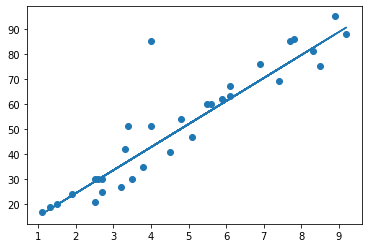

In [78]:
#VISUALIZING RESULTSS
#plotting the linear reg
line=model.coef_*X+model.intercept_
#y=mx+c
#plotting
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

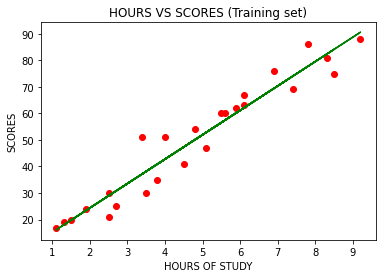

In [80]:
#trainset results
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='green')
plt.title('HOURS VS SCORES (Training set)')
plt.xlabel('HOURS OF STUDY')
plt.ylabel('SCORES')
plt.show()

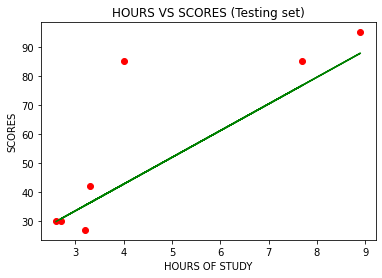

In [82]:
#testset results
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,model.predict(X_test),color='green')
plt.title('HOURS VS SCORES (Testing set)')
plt.xlabel('HOURS OF STUDY')
plt.ylabel('SCORES')
plt.show()

In [83]:
score=float(input("Enter hours of study:"))
pds=model.predict([[score]])
print(pds)


Enter hours of study:5
[[51.95504699]]
